# Sorry, I had to fix my laptop first

In [40]:
pwd

'C:\\Users\\User\\Desktop'

In [21]:
cd C:\\Users\\User\Desktop

C:\Users\User\Desktop


In [22]:
%matplotlib
import numpy
import pandas as pd 
import gensim
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from gensim.models import Phrases
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models import Phrases
import re, string
stop_words = stopwords.words('english')

Using matplotlib backend: Qt5Agg


In [31]:
Data = pd.read_csv('BBC2.csv', index_col = 0)
Data.head()

,description,tags
0,chelsea sack mutu chelsea have sacked adrian ...,"sports, stamford bridge, football association,..."
1,record fails to lift lacklustre meet yelena i...,"sports, madrid, birmingham, france, scotland, ..."
2,edu describes tunnel fracas arsenals edu has ...,"sports, derby, brazil, tunnel fracasedu, food,..."
3,ogara revels in ireland victory ireland flyha...,"sports, bbc, united kingdom, ireland, brian o'..."
4,unclear future for striker baros liverpool fo...,"sports, liverpool, daily sport, millennium sta..."


In [33]:
corpse = Data['tags'].tolist()
corpus = Data['description'].tolist()
stop_words = stopwords.words('english')

In [34]:
# Clean the data

def clean_data(sentence):
    
    clean_sentence = re.sub(r'[^A-Za-z0-9\s.]',r'',str(sentence).lower())
    clean_sentence = re.sub(r'\n',r' ',sentence)
    clean_sentence = " ".join([word for word in sentence.split() if word not in stop_words])
    
    return sentence

cleaned_corpus = [clean_data(sentence) for sentence in corpus]

In [35]:
# Split corpus by sentence and remove stopwords and punctuation
tmp_corpus = [article.split('.') for article in cleaned_corpus]
corpus = []
for i in range(len(tmp_corpus)):
    for line in tmp_corpus[i]:
        words = [word for word in line.split() if not any(c.isdigit() for c in word) and word not in stop_words and word not in string.punctuation]
        if len(words) > 1 and words != '':
            corpus.append(words)
        
corpus[:5]

[['chelsea',
  'sack',
  'mutu',
  'chelsea',
  'sacked',
  'adrian',
  'mutu',
  'failed',
  'drugs',
  'test',
  'yearold',
  'tested',
  'positive',
  'banned',
  'substance',
  'later',
  'denied',
  'cocaine',
  'october',
  'chelsea',
  'decided',
  'write',
  'possible',
  'transfer',
  'fee',
  'mutu',
  'signing',
  'parma',
  'last',
  'season',
  'may',
  'face',
  'twoyear',
  'suspension',
  'statement',
  'chelsea',
  'explaining',
  'decision',
  'readwe',
  'want',
  'make',
  'clear',
  'chelsea',
  'zero',
  'tolerance',
  'policy',
  'towards',
  'drugs',
  'mutu',
  'scored',
  'six',
  'goals',
  'first',
  'five',
  'games',
  'arriving',
  'stamford',
  'bridge',
  'form',
  'went',
  'decline',
  'frozen',
  'coach',
  'jose',
  'mourinho',
  'chelseas',
  'statement',
  'added',
  'applies',
  'performanceenhancing',
  'drugs',
  'socalled',
  'recreational',
  'drugs',
  'place',
  'club',
  'sport',
  'coming',
  'decision',
  'case',
  'chelsea',
  'believed

In [36]:
# --- word2vec movel instantiation and training ---
# --- !!! ADJUST THE NUMBER OF WORKERS BEFORE RUNNING !!! ---

bigram_transformer = Phrases(corpus)
w2v_model = Word2Vec(bigram_transformer[corpus], size=100, min_count=10, window=4, 
                     workers=8, seed=42, sg=1, alpha=0.01) 
w2v_model.train(corpus, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)
print(f"Word2Vec model info: {w2v_model}")

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


Word2Vec model info: Word2Vec(vocab=8040, size=100, alpha=0.01)


In [37]:
# Top-10 related words for "America"
w2v_model.wv.most_similar(positive=['america'])

[('pence', 0.9896190166473389),
 ('carried', 0.9875696301460266),
 ('indian', 0.9871521592140198),
 ('ford', 0.985814094543457),
 ('regions', 0.9840956330299377),
 ('cents', 0.9839907884597778),
 ('closed', 0.9837112426757812),
 ('japans', 0.9836188554763794),
 ('previously', 0.9834177494049072),
 ('capital', 0.9832648038864136)]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


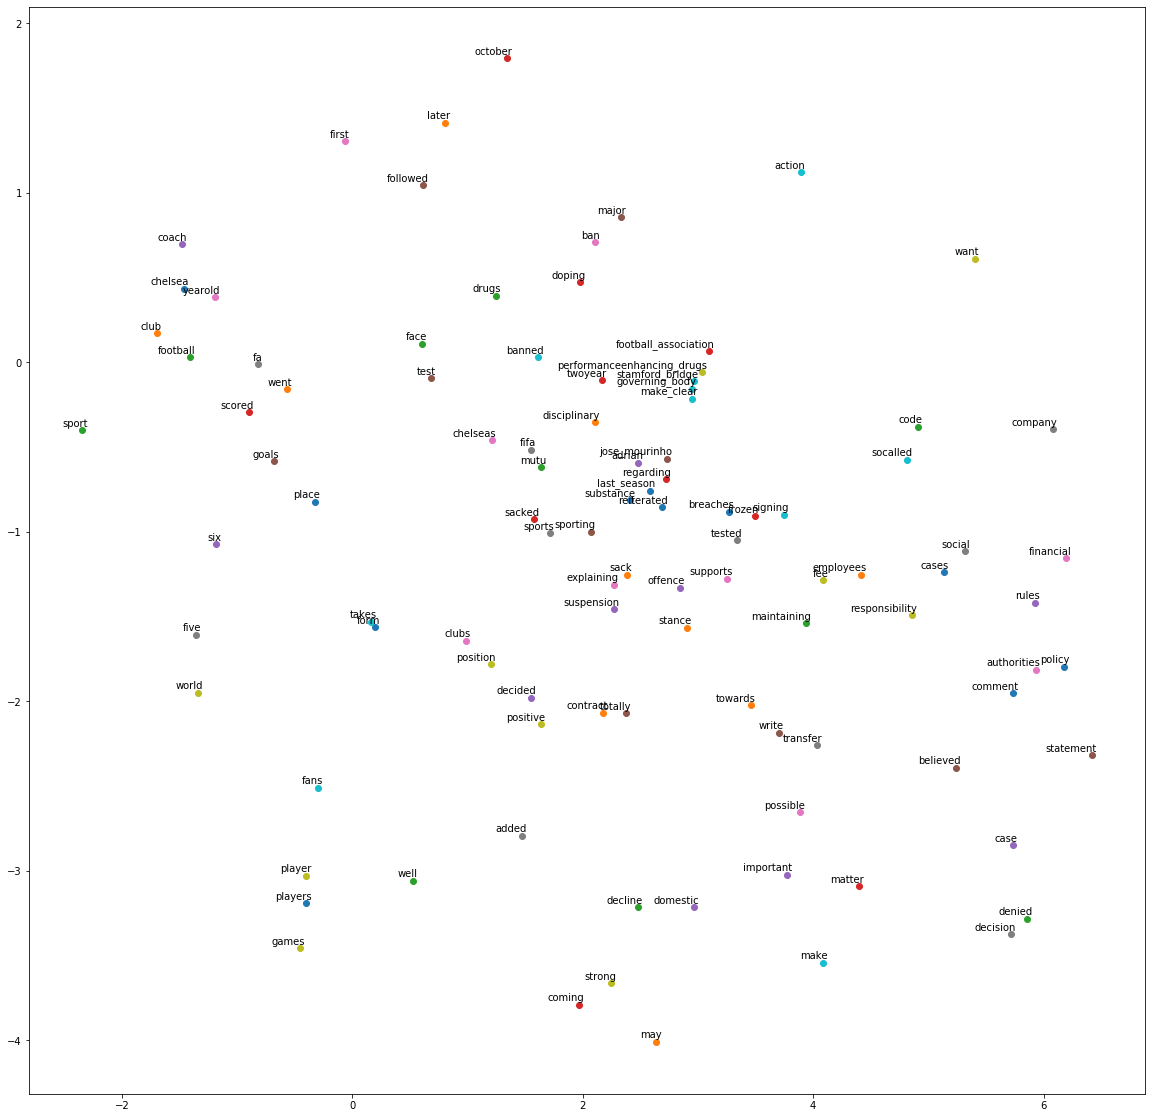

In [38]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline


def tsne_plot(model):

    labels = []
    tokens = []
    
    CX = 0
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        CX += 1
        if CX > 100:
            break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom')
    plt.show()
   
tsne_plot(w2v_model)